# **Atividade Computacional 03 - TEEC III**
## **Aluno: André Paiva Conrado Rodrigues**

## Importando bibliotecas

Nesta seção do código, são importadas bibliotecas de manipulação de dados importantes para a obtenção das amostras dos arquivos de áudio, bem como para a manipulação das mesmas.

In [35]:
import numpy as np
import math
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

## Função para plotagem de espectrograma

In [36]:
def plotar(dataArray, title):
    plt.figure(figsize=(17,5))
    plt.margins(0, 0)    
    plt.xlabel('Amostras')
    plt.title(title)
    plt.plot(dataArray)
    plt.show()

In [37]:
def spectroPlot(audioArray, rate, windowSize, title):
    f, t, Sxx = signal.spectrogram(audioArray, rate, nperseg=windowSize)
    plt.figure(figsize=(17,5))
    plt.pcolormesh(t, f, np.abs(Sxx), shading='auto', cmap='bone', vmin=0, vmax=4095)
    plt.title(title)
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [s]')
    plt.colorbar()
    plt.show()

In [38]:
def downsampleBy2(filename, windowSize):
    samplerate, data = wavfile.read(filename)
    qtdSamples = data.shape[0]
    downsampleList = []
    downRate = int(samplerate/2)
    i = 0
    while(i < qtdSamples):
        downsampleList.append(data[i])
        i = i + 2
    downsampleArray = np.array(downsampleList)
    del downsampleList
    print("Player - Áudio Original")
    display(Audio(filename, rate=samplerate))
    print("Player - Áudio Downsampled")
    display(Audio(downsampleArray, rate=downRate))
    spectroPlot(data, samplerate, windowSize, "Espectrograma - Áudio Original")
    spectroPlot(downsampleArray, downRate, windowSize, "Espectrograma - Áudio Downsampled")
    plotar(data, "Waveform - Áudio Original")
    plotar(downsampleArray, "Waveform - Áudio Downsampled")

In [39]:
def upsampleBy2(filename, windowSize):
    samplerate, data = wavfile.read(filename)
    qtdSamples = data.shape[0]
    upsampleList = []
    upRate = int(samplerate*2)
    i = 0
    while(i < qtdSamples):
        upsampleList.append(data[i])
        upsampleList.append(0)
        i = i + 1
    nonFilteredArray = np.array(upsampleList)
    del upsampleList
    sos = signal.butter(2, samplerate/2, 'lp', fs=upRate, output='sos')
    upsampleArray = signal.sosfilt(sos, nonFilteredArray)
    print("Player - Áudio Original")
    display(Audio(filename, rate=samplerate))
    print("Player - Áudio Upsampled")
    display(Audio(upsampleArray, rate=upRate))
    spectroPlot(data, samplerate, windowSize, "Espectrograma - Áudio Original")
    spectroPlot(upsampleArray, upRate, windowSize, "Espectrograma - Áudio Upsampled")
    plotar(data, "Waveform - Áudio Original")
    plotar(upsampleArray, "Waveform - Áudio Upsampled")

Player - Áudio Original


Player - Áudio Downsampled


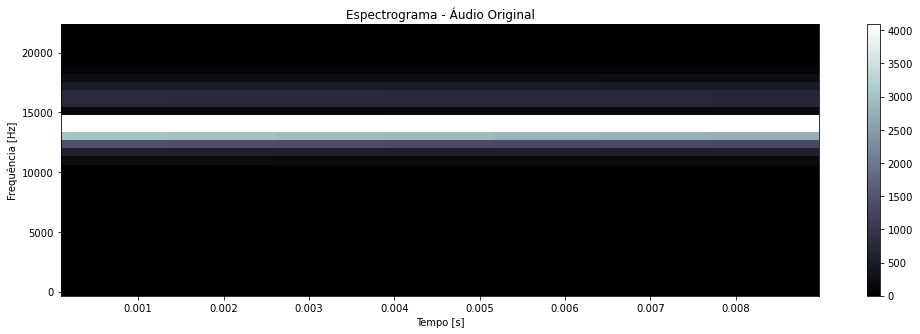

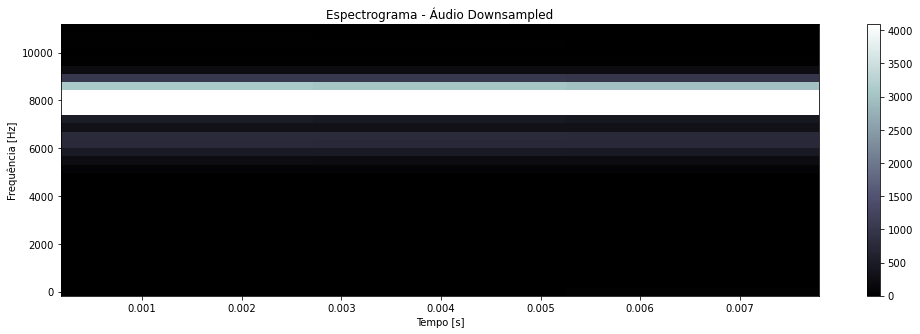

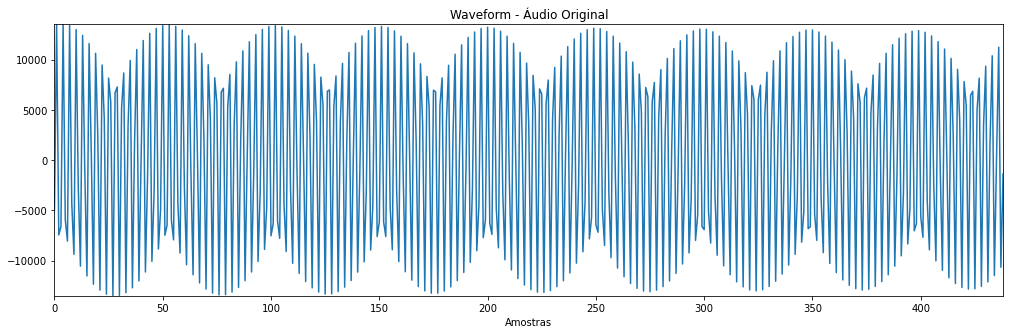

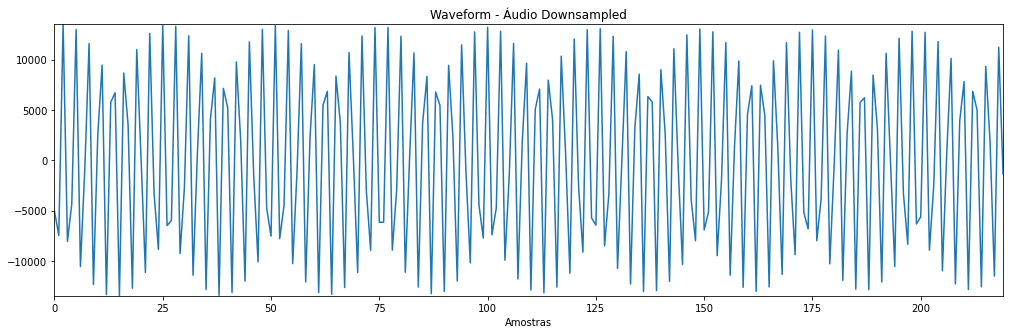

In [40]:
downsampleBy2('highfreq.wav', 64)

Player - Áudio Original


Player - Áudio Upsampled


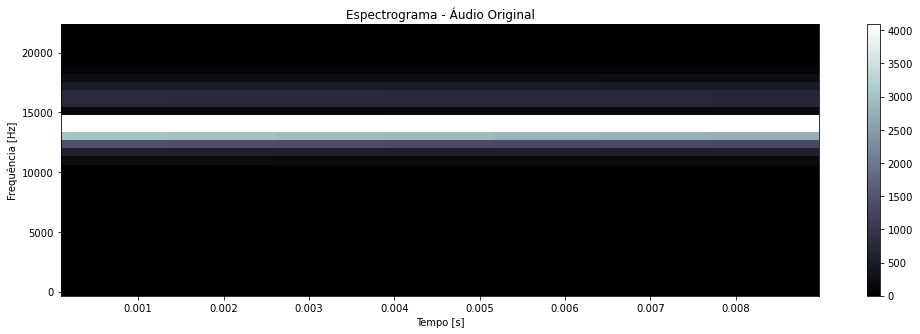

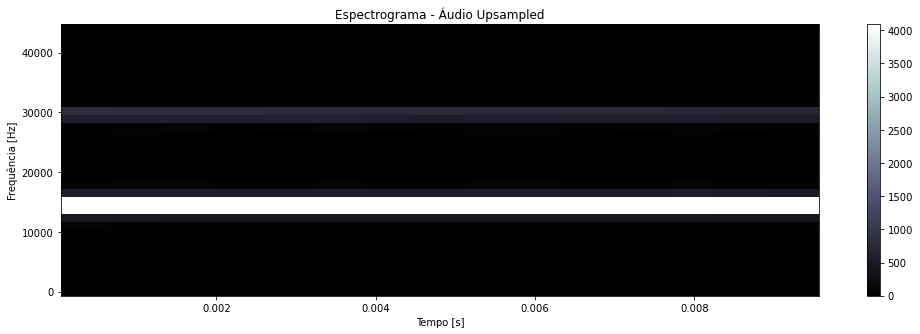

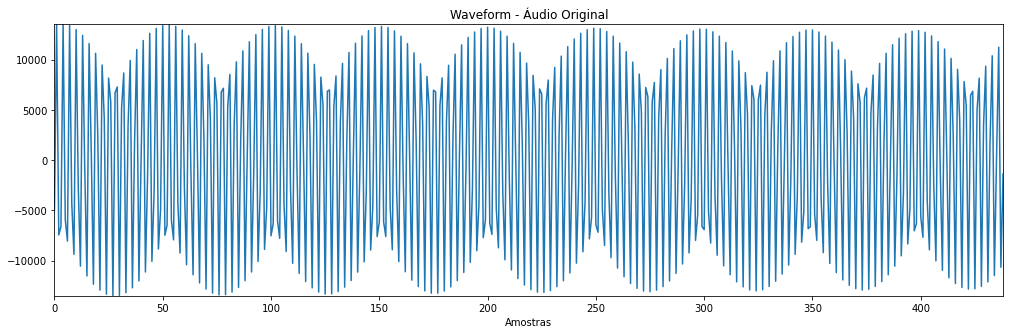

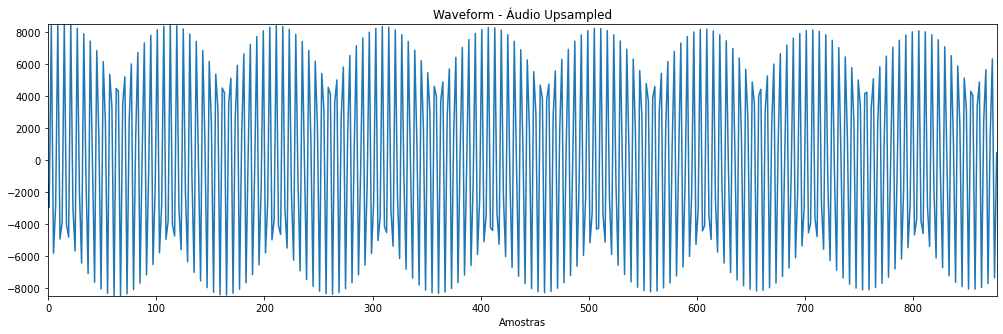

In [41]:
upsampleBy2('highfreq.wav', 64)